# Waze User Churn Prediction

Welcome to the Waze User Churn Prediction project! In this notebook, we dive into the challenge of predicting user churn for the Waze app. Our objective is to develop robust machine learning models that can forecast whether a Waze user will continue using the app or potentially churn.


# **Project Overview**

As part of our efforts to enhance user retention and drive growth, we have applied advanced tree-based modeling techniques to tackle this problem. We previously explored and analyzed user data, performed visualizations, and tested hypotheses. Now, we’re building on this foundation by comparing two powerful models: Random Forest and XGBoost. These models will help us identify key factors driving user churn and make informed recommendations to the Waze leadership team.

### What You'll Find

In this notebook, you’ll find a comprehensive approach to:
- **Ethical Considerations:** We’ll start by reflecting on the ethical implications of our predictions and the potential impact of our model's errors.
- **Feature Engineering:** We’ll prepare and refine our data through feature selection, extraction, and transformation.
- **Modeling:** We’ll build and evaluate our tree-based models, comparing their performance and discussing the next steps.

Our goal is to deliver actionable insights that will aid in reducing user churn and improving retention strategies for Waze.



# **Build a machine learning model**


# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

## **PACE: Plan**

In this stage, we reflect on the following key questions to ensure our approach is well-defined and ethically sound:

1. **What are you being asked to do?**
   - Our task is to develop a machine learning model to predict whether a Waze user will churn (i.e., stop using the app) or remain active.

2. **What are the ethical implications of the model?**
   - **False Negatives:** If the model incorrectly predicts that a user will not churn when they actually will, Waze might fail to address issues that could lead to user loss. This could result in missed opportunities to improve user experience for at-risk users.
   - **False Positives:** If the model incorrectly predicts that a user will churn when they will not, Waze might implement unnecessary retention measures. This could potentially annoy users who are not at risk of churning, impacting their overall experience negatively.

3. **Do the benefits of the model outweigh the potential problems?**
   - Building this model can significantly enhance Waze’s ability to proactively manage user retention. While there are risks associated with false predictions, the potential benefits—such as targeted retention efforts and better resource allocation—are likely to outweigh these issues. Proper handling and analysis of false positives and negatives will help mitigate potential drawbacks.

4. **Would you proceed with the request to build this model? Why or why not?**
   - Yes, proceeding with the development of this model is advisable. The benefits of accurately predicting user churn and improving retention strategies justify the effort. Proactive measures should be continuously evaluated to ensure they are effective and to minimize any unintended negative effects on users.

By addressing these considerations, we ensure that the model is both effective and ethically responsible.

### **Task 1. Imports and data loading**

Import packages and libraries needed to build and evaluate random forest and XGBoost classification models.

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# This lets us see all of the columns, preventing Juptyer from redacting them.
pd.set_option('display.max_columns', None)
# Import packages for data modeling
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, \
confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
import xgboost
# This is the function that helps plot feature importance
from xgboost import plot_importance
# This module lets us save our models once we fit them.
import pickle

Now read in the dataset as `df0` and inspect the first five rows.

**Note:** As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [2]:
# Import dataset
df0 = pd.read_csv('waze_dataset.csv')

In [3]:
# Inspect the first five rows
df0.head(5)

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


## **PACE: Analyze**
Consider the questions in your PACE Strategy Document to reflect on the Analyze stage.

### **Task 2. Feature engineering**

You have already prepared much of this data and performed exploratory data analysis (EDA) in previous courses. You know that some features had stronger correlations with churn than others, and you also created some features that may be useful.

In this part of the project, you'll engineer these features and some new features to use for modeling.

To begin, create a copy of `df0` to preserve the original dataframe. Call the copy `df`.

In [4]:
# Copy the df0 dataframe
df = df0.copy()

Call `info()` on the new dataframe so the existing columns can be easily referenced.

In [5]:
### YOUR CODE HERE ###
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


#### **`km_per_driving_day`**

1. Create a feature representing the mean number of kilometers driven on each driving day in the last month for each user. Add this feature as a column to `df`.

2. Get descriptive statistics for this new feature



In [6]:
# 1. Create `km_per_driving_day` feature
df["km_per_driving_day"] = df["driven_km_drives"]/df["driving_days"]
# 2. Get descriptive stats
df["km_per_driving_day"].describe()

/usr/local/lib/python3.10/dist-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


,km_per_driving_day
count,1.499900e+04
mean,inf
std,NaN
min,3.022063e+00
25%,1.672804e+02
50%,3.231459e+02
75%,7.579257e+02
max,inf


Notice that some values are infinite. This is the result of there being values of zero in the `driving_days` column. Pandas imputes a value of infinity in the corresponding rows of the new column because division by zero is undefined.

1. Convert these values from infinity to zero. You can use `np.inf` to refer to a value of infinity.

2. Call `describe()` on the `km_per_driving_day` column to verify that it worked.

In [7]:
# 1. Convert infinite values to zero
df.loc[df["km_per_driving_day"] == np.inf, "km_per_driving_day"] = 0
# 2. Confirm that it worked
df["km_per_driving_day"].describe()

,km_per_driving_day
count,14999.000000
mean,578.963113
std,1030.094384
min,0.000000
25%,136.238895
50%,272.889272
75%,558.686918
max,15420.234110


#### **`percent_sessions_in_last_month`**

1. Create a new column `percent_sessions_in_last_month` that represents the percentage of each user's total sessions that were logged in their last month of use.

2. Get descriptive statistics for this new feature

In [8]:
# 1. Create `percent_sessions_in_last_month` feature
df["percent_sessions_in_last_month"] = df["sessions"]/df["total_sessions"]
# 1. Get descriptive stats
df["percent_sessions_in_last_month"].describe()

,percent_sessions_in_last_month
count,14999.000000
mean,0.449255
std,0.286919
min,0.000000
25%,0.196221
50%,0.423097
75%,0.687216
max,1.530637


#### **`professional_driver`**

Create a new, binary feature called `professional_driver` that is a 1 for users who had 60 or more drives <u>**and**</u> drove on 15+ days in the last month.

**Note:** The objective is to create a new feature that separates professional drivers from other drivers. In this scenario, domain knowledge and intuition are used to determine these deciding thresholds, but ultimately they are arbitrary.

To create this column, use the [`np.where()`](https://numpy.org/doc/stable/reference/generated/numpy.where.html) function. This function accepts as arguments:
1. A condition
2. What to return when the condition is true
3. What to return when the condition is false

```
Example:
x = [1, 2, 3]
x = np.where(x > 2, 100, 0)
x
array([  0,   0, 100])
```

In [9]:
# Create `professional_driver` feature
### YOUR CODE HERE ###
df["professional_driver"] = np.where((df["drives"] >= 60) & (df["driving_days"] >= 15), 1, 0)
df["professional_driver"]

,professional_driver
0,1
1,0
2,0
3,0
4,1
...,...
14994,0
14995,0
14996,1
14997,0


#### **`total_sessions_per_day`**

Now, create a new column that represents the mean number of sessions per day _since onboarding_.

In [10]:
# Create `total_sessions_per_day` feature
df["total_sessions_per_day"] = df["total_sessions"]/df["n_days_after_onboarding"]

As with other features, get descriptive statistics for this new feature.

In [11]:
# Get descriptive stats
df["total_sessions_per_day"].describe()

,total_sessions_per_day
count,14999.000000
mean,0.338698
std,1.314333
min,0.000298
25%,0.051037
50%,0.100775
75%,0.216269
max,39.763874


#### **`km_per_hour`**

Create a column representing the mean kilometers per hour driven in the last month.

In [12]:
# Create `km_per_hour` feature
df["km_per_hour"] = df["driven_km_drives"] / (df["duration_minutes_drives"]/60).astype(float)

In [13]:
df["km_per_hour"].describe()

,km_per_hour
count,14999.000000
mean,190.394608
std,334.674026
min,72.013095
25%,90.706222
50%,122.382022
75%,193.130119
max,23642.920871


#### **`km_per_drive`**

Create a column representing the mean number of kilometers per drive made in the last month for each user. Then, print descriptive statistics for the feature.

In [14]:
# Create `km_per_drive` feature
df["km_per_drive"] = df["driven_km_drives"] / df["drives"]

This feature has infinite values too. Convert the infinite values to zero, then confirm that it worked.

In [15]:
# 1. Convert infinite values to zero
df.loc[df["km_per_drive"] == np.inf, "km_per_drive"] = 0
# 2. Confirm that it worked
df["km_per_drive"].describe()

,km_per_drive
count,14999.000000
mean,232.817946
std,620.622351
min,0.000000
25%,32.424301
50%,72.854343
75%,179.347527
max,15777.426560


#### **`percent_of_sessions_to_favorite`**

Finally, create a new column that represents the percentage of total sessions that were used to navigate to one of the users' favorite places. Then, print descriptive statistics for the new column.

This is a proxy representation for the percent of overall drives that are to a favorite place. Since total drives since onboarding are not contained in this dataset, total sessions must serve as a reasonable approximation.

People whose drives to non-favorite places make up a higher percentage of their total drives might be less likely to churn, since they're making more drives to less familiar places.

In [16]:
# Create `percent_of_sessions_to_favorite` feature
df["percent_of_sessions_to_favorite"] = (df["total_navigations_fav1"] + df["total_navigations_fav2"])/df["total_sessions"]
# Get descriptive stats
df["percent_of_sessions_to_favorite"].describe()

,percent_of_sessions_to_favorite
count,14999.000000
mean,1.665439
std,8.865666
min,0.000000
25%,0.203471
50%,0.649818
75%,1.638526
max,777.563629


### **Task 3. Drop missing values**

Because you know from previous EDA that there is no evidence of a non-random cause of the 700 missing values in the `label` column, and because these observations comprise less than 5% of the data, use the `dropna()` method to drop the rows that are missing this data.

In [17]:
# Drop rows with missing values
df = df.dropna()
df.isna().sum()

,0
ID,0
label,0
sessions,0
drives,0
total_sessions,0
n_days_after_onboarding,0
total_navigations_fav1,0
total_navigations_fav2,0
driven_km_drives,0
duration_minutes_drives,0


### **Task 4. Outliers**

You know from previous EDA that many of these columns have outliers. However, tree-based models are resilient to outliers, so there is no need to make any imputations.

### **Task 5. Variable encoding**

#### **Dummying features**

In order to use `device` as an X variable, you will need to convert it to binary, since this variable is categorical.

In cases where the data contains many categorical variables, you can use pandas built-in [`pd.get_dummies()`](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), or you can use scikit-learn's [`OneHotEncoder()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) function.

**Note:** Each possible category of each feature will result in a feature for your model, which could lead to an inadequate ratio of features to observations and/or difficulty understanding your model's predictions.

Because this dataset only has one remaining categorical feature (`device`), it's not necessary to use one of these special functions. You can just implement the transformation directly.

Create a new, binary column called `device2` that encodes user devices as follows:

* `Android` -> `0`
* `iPhone` -> `1`

In [18]:
# Create new `device2` variable
### YOUR CODE HERE ###
mapper = {"Android" : 0, "iPhone" : 1}
df["device2"] = df["device"].map(mapper)

#### **Target encoding**

The target variable is also categorical, since a user is labeled as either "churned" or "retained." Change the data type of the `label` column to be binary. This change is needed to train the models.

Assign a `0` for all `retained` users.

Assign a `1` for all `churned` users.

Save this variable as `label2` so as not to overwrite the original `label` variable.

**Note:** There are many ways to do this. Consider using `np.where()` as you did earlier in this notebook.

In [19]:
# Create binary `label2` column
df['label2'] = np.where(df['label']=='churned', 1, 0)

### **Task 6. Feature selection**

Tree-based models can handle multicollinearity, so the only feature that can be cut is `ID`, since it doesn't contain any information relevant to churn.

Note, however, that `device` won't be used simply because it's a copy of `device2`.

Drop `ID` from the `df` dataframe.

In [20]:
# Drop `ID` column
df = df.drop(columns = "ID")

### **Task 7. Evaluation metric**

Before modeling, you must decide on an evaluation metric. This will depend on the class balance of the target variable and the use case of the model.

First, examine the class balance of your target variable.

In [21]:
# Get class balance of 'label' col
### YOUR CODE HERE ###
print(df["label"].value_counts(normalize=True))
print(df["label2"].value_counts(normalize=True))

label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64
label2
0    0.822645
1    0.177355
Name: proportion, dtype: float64


Approximately 18% of the users in this dataset churned. This is an unbalanced dataset, but not extremely so. It can be modeled without any class rebalancing.

Now, consider which evaluation metric is best. Remember, accuracy might not be the best gauge of performance because a model can have high accuracy on an imbalanced dataset and still fail to predict the minority class.

It was already determined that the risks involved in making a false positive prediction are minimal. No one stands to get hurt, lose money, or suffer any other significant consequence if they are predicted to churn. Therefore, select the model based on the recall score.

## **PACE: Construct**
Consider the questions in your PACE Strategy Document to reflect on the Construct stage.

### **Task 8. Modeling workflow and model selection process**

The final modeling dataset contains 14,299 samples. This is towards the lower end of what might be considered sufficient to conduct a robust model selection process, but still doable.

1. Split the data into train/validation/test sets (60/20/20)

Note that, when deciding the split ratio and whether or not to use a validation set to select a champion model, consider both how many samples will be in each data partition, and how many examples of the minority class each would therefore contain. In this case, a 60/20/20 split would result in \~2,860 samples in the validation set and the same number in the test set, of which \~18%&mdash;or 515 samples&mdash;would represent users who churn.
2. Fit models and tune hyperparameters on the training set
3. Perform final model selection on the validation set
4. Assess the champion model's performance on the test set

![](https://raw.githubusercontent.com/adacert/tiktok/main/optimal_model_flow_numbered.svg)

### **Task 9. Split the data**

Now you're ready to model. The only remaining step is to split the data into features/target variable and training/validation/test sets.

1. Define a variable `X` that isolates the features. Remember not to use `device`.

2. Define a variable `y` that isolates the target variable (`label2`).

3. Split the data 80/20 into an interim training set and a test set. Don't forget to stratify the splits, and set the random state to 42.

4. Split the interim training set 75/25 into a training set and a validation set, yielding a final ratio of 60/20/20 for training/validation/test sets. Again, don't forget to stratify the splits and set the random state.

In [22]:
# 1. Isolate X variables
X = df.drop(columns = ["label", "label2", "device"])
# 2. Isolate y variable
y = df["label2"]
# 3. Split into train and test sets
X_tr, X_test, y_tr, y_test = train_test_split(X, y, random_state=  42, stratify = y, test_size = 0.2)
# 4. Split into train and validate sets
X_train, X_val, y_train, y_val = train_test_split(X_tr, y_tr, random_state=  42,
                                                  test_size = 0.25, stratify = y_tr)

Verify the number of samples in the partitioned data.

In [ ]:
### YOUR CODE HERE ###
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(8579, 18)
(2860, 18)
(2860, 18)
(8579,)
(2860,)
(2860,)


This aligns with expectations.

### **Task 10. Modeling**

#### **Random forest**

Begin with using `GridSearchCV` to tune a random forest model.

1. Instantiate the random forest classifier `rf` and set the random state.

2. Create a dictionary `cv_params` of any of the following hyperparameters and their corresponding values to tune. The more you tune, the better your model will fit the data, but the longer it will take.
 - `max_depth`
 - `max_features`
 - `max_samples`
 - `min_samples_leaf`
 - `min_samples_split`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for GridSearch to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `rf_cv`. Pass to it as arguments:
 - estimator=`rf`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit=_`)

 `refit` should be set to `'recall'`.<font/>



**Note:** To save time, this exemplar doesn't use multiple values for each parameter in the grid search, but you should include a range of values in your search to home in on the best set of parameters.

In [ ]:
# 1. Instantiate the random forest classifier
rf = RandomForestClassifier(random_state = 42)
# 2. Create a dictionary of hyperparameters to tune
cv_params = {"n_estimators" : [300],
            "max_depth" : [None],
            "min_samples_split": [2],
            "min_samples_leaf": [2],
            "max_features": [1.0],
            "max_samples": [1.0]}
# 3. Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "recall", "precision", "f1"]
# 4. Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring = scoring, cv = 4, refit = "recall")

Now fit the model to the training data.

In [ ]:
%%time
rf_cv.fit(X_train, y_train)

CPU times: total: 2min 41s
Wall time: 2min 57s


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None], 'max_features': [1.0],
                         'max_samples': [1.0], 'min_samples_leaf': [2],
                         'min_samples_split': [2], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'recall', 'precision', 'f1'])

In [ ]:
import pickle

path = "pickle/"

def make_pickle(path, model_object, model_name:str):
    with open(path + model_name + ".pickle", "wb") as to_write:
        pickle.dump(model_object, to_write)

def read_pickle(path, model_name:str):
    with open(path + model_name + ".pickle", "rb") as to_read:
        model = pickle.load(to_read)
        return model

In [ ]:
make_pickle(path, rf_cv, "rf_cv")

In [ ]:
rf_cv = read_pickle(path, "rf_cv")
rf_cv.best_score_

0.12678201409034398

Examine the best average score across all the validation folds.

In [ ]:
# Examine best score
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

Examine the best combination of hyperparameters.

In [ ]:
# Examine best hyperparameter combo
rf_cv.best_params_

{'max_depth': None,
 'max_features': 1.0,
 'max_samples': 1.0,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'n_estimators': 300}

In [ ]:
pd.DataFrame(rf_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_accuracy,split1_test_accuracy,split2_test_accuracy,split3_test_accuracy,mean_test_accuracy,std_test_accuracy,rank_test_accuracy,split0_test_recall,split1_test_recall,split2_test_recall,split3_test_recall,mean_test_recall,std_test_recall,rank_test_recall,split0_test_precision,split1_test_precision,split2_test_precision,split3_test_precision,mean_test_precision,std_test_precision,rank_test_precision,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,32.875738,0.680773,0.131716,0.019157,None,1.0,1.0,2,2,300,"{'max_depth': None, 'max_features': 1.0, 'max_...",0.821911,0.825175,0.812587,0.814366,0.81851,0.005202,1,0.146982,0.144357,0.107895,0.107895,0.126782,0.01891,1,0.495575,0.528846,0.394231,0.41,0.457163,0.056566,1,0.226721,0.226804,0.169421,0.170833,0.198445,0.028322,1


Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [ ]:
def make_results(model_name:str, model_object, metric:str):
    # Create dictionary that maps input metric to actual metric name in GridSearchCV

    metrics_dict = {"accuracy" : "mean_test_accuracy",
                   "precision" : "mean_test_precision",
                   "recall" : "mean_test_recall",
                   "f1" : "mean_test_f1"}
    # Get all the results from the CV and put them in a df

    result = pd.DataFrame(model_object.cv_results_)
    # Isolate the row of the df with the max(metric) score

    best_result = result.loc[result[metrics_dict[metric]].idxmax(), :]
    # Extract Accuracy, precision, recall, and f1 score from that row

    accuracy = best_result["mean_test_accuracy"]
    precision = best_result["mean_test_precision"]
    recall = best_result["mean_test_recall"]
    f1 = best_result["mean_test_f1"]
    # Create table of results

    table = pd.DataFrame({"Model" : [model_name],
                         "Recall" : [recall],
                         "Accuracy": [accuracy],
                         "Precision": [precision],
                         "f1" : [f1]})
    return table
    '''
    Arguments:
        model_name (string): what you want the model to be called in the output table
        model_object: a fit GridSearchCV object
        metric (string): precision, recall, f1, or accuracy

    Returns a pandas df with the F1, recall, precision, and accuracy scores
    for the model with the best mean 'metric' score across all validation folds.
    '''


Pass the `GridSearch` object to the `make_results()` function.

In [ ]:
TRF_table = make_results("Tuned Random Forest", rf_cv, "recall")
TRF_table

,Model,Recall,Accuracy,Precision,f1
0,Tuned Random Forest,0.126782,0.81851,0.457163,0.198445


Asside from the accuracy, the scores aren't that good. However, when we built the logistic regression model in the last session the recall was \~0.09, which means that this model has 33% better recall and about the same accuracy, and it was trained on less data.

Hence, it is suggested that, feel free to try retuning the hyperparameters to try to get a better score. It might be able to marginally improve the model.

#### **XGBoost**

 Try to improve your scores using an XGBoost model.

1. Instantiate the XGBoost classifier `xgb` and set `objective='binary:logistic'`. Also set the random state.

2. Create a dictionary `cv_params` of the following hyperparameters and their corresponding values to tune:
 - `max_depth`
 - `min_child_weight`
 - `learning_rate`
 - `n_estimators`

3. Define a dictionary `scoring` of scoring metrics for grid search to capture (precision, recall, F1 score, and accuracy).

4. Instantiate the `GridSearchCV` object `xgb_cv`. Pass to it as arguments:
 - estimator=`xgb`
 - param_grid=`cv_params`
 - scoring=`scoring`
 - cv: define the number of cross-validation folds you want (`cv=_`)
 - refit: indicate which evaluation metric you want to use to select the model (`refit='recall'`)

In [ ]:
# 1. Instantiate the XGBoost classifier
from xgboost import XGBClassifier
xgb = XGBClassifier(objective = "binary:logistic", random_state = 42)
# 2. Create a dictionary of hyperparameters to tune
cv_params = {"n_estimators" : [300],
            "max_depth" : [6, 12],
            "min_child_weight": [3,5],
            "learning_rate" : [0.01, 0.1]
            }
# 3. Define a dictionary of scoring metrics to capture
scoring = ["accuracy", "precision", "recall", "f1"]
# 4. Instantiate the GridSearchCV object
xgb_cv = GridSearchCV(xgb, cv_params, scoring = scoring, refit = "recall", cv = 4)

Now fit the model to the `X_train` and `y_train` data.

Note this cell might take several minutes to run.

In [ ]:
%%time
xgb_cv.fit(X_train, y_train)

CPU times: total: 3min 1s
Wall time: 1min 2s


GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             param_grid={'learning_rate': [0.01, 0.1], 'max_depth': [6, 12],
                         'min_child_weight': [3, 5], 'n_estimators': [300]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [ ]:
make_pickle(path, xgb_cv, "xgb_cv")

In [ ]:
xgb_cv = read_pickle(path, "xgb_cv")

Get the best score from this model.

In [ ]:
# Examine best score
xgb_cv.best_score_

0.1708264263019754

And the best parameters.

In [ ]:
# Examine best parameters
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 6,
 'min_child_weight': 5,
 'n_estimators': 300}

Use the `make_results()` function to output all of the scores of your model. Note that the function accepts three arguments.

In [ ]:
# Call 'make_results()' on the GridSearch object
### YOUR CODE HERE
xgb_result = make_results("XGBoost", xgb_cv, "recall")
result = pd.concat([TRF_table, xgb_result], axis = 0)
result

,Model,Recall,Accuracy,Precision,f1
0,Tuned Random Forest,0.126782,0.818510,0.457163,0.198445
0,XGBoost,0.170826,0.811866,0.425932,0.243736


This model fit the data even better than the random forest model. The recall score is nearly double the recall score from the logistic regression model from the previous session, and it's almost 50% better than the random forest model's recall score, while maintaining a similar accuracy and precision score.

### **Task 11. Model selection**

Now, use the best random forest model and the best XGBoost model to predict on the validation data. Whichever performs better will be selected as the champion model.

#### **Random forest**

In [ ]:
# Use random forest model to predict on validation data
rf_val_pred = rf_cv.best_estimator_.predict(X_val)

Use the `get_test_scores()` function to generate a table of scores from the predictions on the validation data.

In [ ]:
def get_test_scores(model_name:str, preds, y_test_data):
    '''
    Generate a table of test scores.

    In:
        model_name (string): Your choice: how the model will be named in the output table
        preds: numpy array of test predictions
        y_test_data: numpy array of y_test data

    Out:
        table: a pandas df of precision, recall, f1, and accuracy scores for your model
    '''
    accuracy = accuracy_score(y_test_data, preds)
    precision = precision_score(y_test_data, preds)
    recall = recall_score(y_test_data, preds)
    f1 = f1_score(y_test_data, preds)

    table = pd.DataFrame({"Model" : [model_name],
                         "Recall" : [recall],
                         "Accuracy": [accuracy],
                         "Precision": [precision],
                         "f1" : [f1]
                          })

    return table

In [ ]:
# Get validation scores for RF model
TRFval_table = get_test_scores("Tuned Random Forest_val", rf_val_pred, y_val)
result_1 = pd.concat([result, TRFval_table], axis = 0)
# Append to the results table
result_1

,Model,Recall,Accuracy,Precision,f1
0,Tuned Random Forest,0.126782,0.818510,0.457163,0.198445
0,XGBoost,0.170826,0.811866,0.425932,0.243736
0,Tuned Random Forest_val,0.120316,0.817483,0.445255,0.189441


Notice that the scores went down from the training scores across all metrics, but only by very little. This means that the model did not overfit the training data.

#### **XGBoost**

Now, do the same thing to get the performance scores of the XGBoost model on the validation data.

In [ ]:
# Use XGBoost model to predict on validation data
xgb_val = xgb_cv.best_estimator_.predict(X_val)
# Get validation scores for XGBoost model
xgb_val_result = get_test_scores("XGB_val", xgb_val, y_val)
# Append to the results table
result_2 = pd.concat([result_1, xgb_val_result], axis = 0)
result_2

,Model,Recall,Accuracy,Precision,f1
0,Tuned Random Forest,0.126782,0.818510,0.457163,0.198445
0,XGBoost,0.170826,0.811866,0.425932,0.243736
0,Tuned Random Forest_val,0.120316,0.817483,0.445255,0.189441
0,XGB_val,0.161736,0.812238,0.422680,0.233951


Just like with the random forest model, the XGBoost model's validation scores were lower, but only very slightly. It is still the clear champion.

## **PACE: Execute**
Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### **Task 12. Use champion model to predict on test data**

Now, use the champion model to predict on the test dataset. This is to give a final indication of how you should expect the model to perform on new future data, should you decide to use the model.

In [ ]:
# Use XGBoost model to predict on test data
### YOUR CODE HERE ###
xgb_pred_final  = xgb_cv.predict(X_test)
# Get test scores for XGBoost model
### YOUR CODE HERE ###
xgb_test_score = get_test_scores("XGB FINAL TEST", xgb_pred_final, y_test)
# Append to the results table
### YOUR CODE HERE ###
result_final = pd.concat([result_2, xgb_test_score], axis = 0)
result_final

,Model,Recall,Accuracy,Precision,f1
0,Tuned Random Forest,0.126782,0.818510,0.457163,0.198445
0,XGBoost,0.170826,0.811866,0.425932,0.243736
0,Tuned Random Forest_val,0.120316,0.817483,0.445255,0.189441
0,XGB_val,0.161736,0.812238,0.422680,0.233951
0,XGB FINAL TEST,0.181460,0.811189,0.423963,0.254144


The recall was exactly the same as it was on the validation data, but the precision declined notably, which caused all of the other scores to drop slightly. Nonetheless, this is stil within the acceptable range for performance discrepancy between validation and test scores.

### **Task 13. Confusion matrix**

Plot a confusion matrix of the champion model's predictions on the test data.

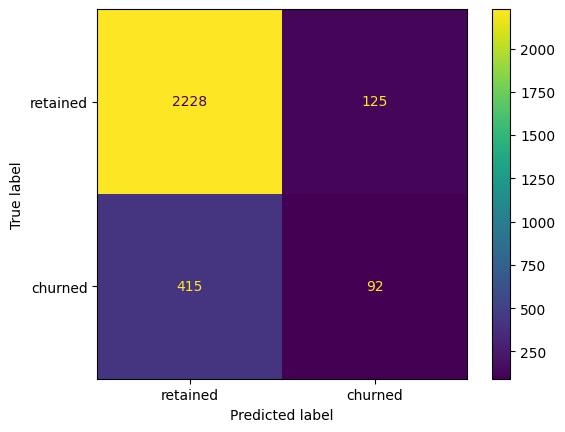

In [ ]:
# Generate array of values for confusion matrix
cm = confusion_matrix(y_test, xgb_pred_final)
# Plot confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels = ["retained", "churned"])
disp.plot()

The model predicted three times as many false negatives than it did false positives, and it correctly identified only 16.6% of the users who actually churned.

### **Task 14. Feature importance**

Use the `plot_importance` function to inspect the most important features of your final model.

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

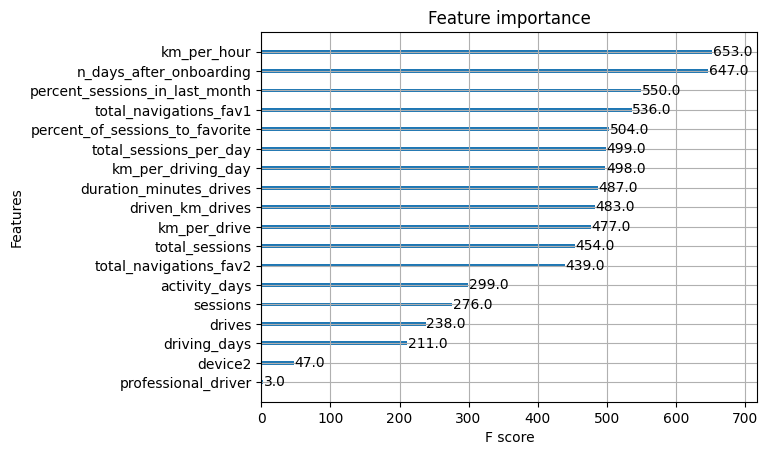

In [ ]:
plot_importance(xgb_cv.best_estimator_)

The XGBoost model made more use of many of the features than did the logistic regression model from the previous course, which weighted a single feature (`activity_days`) very heavily in its final prediction.

If anything, this underscores the importance of feature engineering. Notice that engineered features accounted for six of the top 10 features (and three of the top five). Feature engineering is often one of the best and easiest ways to boost model performance.

Also, note that the important features in one model might not be the same as the important features in another model. That's why you shouldn't discount features as unimportant without thoroughly examining them and understanding their relationship with the dependent variable, if possible. These discrepancies between features selected by models are typically caused by complex feature interactions.

Remember, sometimes your data simply will not be predictive of your chosen target. This is common. Machine learning is a powerful tool, but it is not magic. If your data does not contain predictive signal, even the most complex algorithm will not be able to deliver consistent and accurate predictions. Do not be afraid to draw this conclusion.

Even if you cannot use the model to make strong predictions, was the work done in vain? What insights can you report back to stakeholders?

### **Task 15. Conclusion**

Now that you've built and tested your machine learning models, the next step is to share your findings with the Waze leadership team. Consider the following questions as you prepare to write your executive summary. Think about key points you may want to share with the team, and what information is most relevant to the user churn project.

**Questions:**

1. Would you recommend using this model for churn prediction? Why or why not?

> _It depends. What would the model be used for? If it's used to drive consequential business decisions, then no. The model is not a strong enough predictor, as made clear by its poor recall score. However, if the model is only being used to guide further exploratory efforts, then it can have value._

2. What tradeoff was made by splitting the data into training, validation, and test sets as opposed to just training and test sets?

> _Splitting the data three ways means that there is less data available to train the model than splitting just two ways. However, performing model selection on a separate validation set enables testing of the champion model by itself on the test set, which gives a better estimate of future performance than splitting the data two ways and selecting a champion model by performance on the test data._

3. What is the benefit of using a logistic regression model over an ensemble of tree-based models (like random forest or XGBoost) for classification tasks?

> _Logistic regression models are easier to interpret. Because they assign coefficients to predictor variables, they reveal not only which features factored most heavily into their final predictions, but also the directionality of the weight. In other words, they tell you if each feature is positively or negatively correlated with the target in the model's final prediction._

4. What is the benefit of using an ensemble of tree-based models like random forest or XGBoost over a logistic regression model for classification tasks?

> _Tree-based model ensembles are often better predictors. If the most important thing is the predictive power of the model, then tree-based modeling will usually win out against logistic regression (but not always!). They also require much less data cleaning and require fewer assumptions about the underlying distributions of their predictor variables, so they're easier to work with._

5. What could you do to improve this model?

> _New features could be engineered to try to generate better predictive signal, as they often do if you have domain knowledge. In the case of this model, the engineered features made up over half of the top 10 most-predictive features used by the model. It could also be helpful to reconstruct the model with different combinations of predictor variables to reduce noise from unpredictive features._

6. What additional features would you like to have to help improve the model?

> _It would be helpful to have drive-level information for each user (such as drive times, geographic locations, etc.). It would probably also be helpful to have more granular data to know how users interact with the app. For example, how often do they report or confirm road hazard alerts? Finally, it could be helpful to know the monthly count of unique starting and ending locations each driver inputs._


### **Additional**

#### **Identify an optimal decision threshold**

The default decision threshold for most implementations of classification algorithms&mdash;including scikit-learn's&mdash;is 0.5. This means that, in the case of the Waze models, if they predicted that a given user had a 50% probability or greater of churning, then that user was assigned a predicted value of `1`&mdash;the user was predicted to churn.

With imbalanced datasets where the response class is a minority, this threshold might not be ideal. You learned that a precision-recall curve can help to visualize the trade-off between your model's precision and recall.

Here's the precision-recall curve for the XGBoost champion model on the test data.

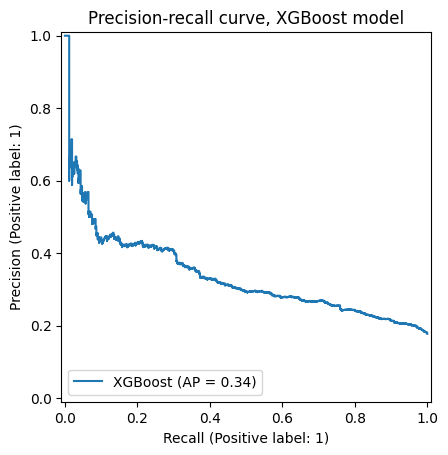

In [ ]:
# Plot precision-recall curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay


display = PrecisionRecallDisplay.from_estimator(xgb_cv.best_estimator_, X_test, y_test,
                                               name = "XGBoost")
plt.title('Precision-recall curve, XGBoost model');

As recall increases, precision decreases. But what if you determined that false positives aren't much of a problem? For example, in the case of this Waze project, a false positive could just mean that a user who will not actually churn gets an email and a banner notification on their phone. It's very low risk.

So, what if instead of using the default 0.5 decision threshold of the model, you used a lower threshold?

Here's an example where the threshold is set to 0.4:

In [ ]:
# Get predicted probabilities on the test data
xgb_proba = xgb_cv.best_estimator_.predict_proba(X_test)
xgb_proba

array([[0.94572806, 0.05427194],
       [0.57626796, 0.42373204],
       [0.98132175, 0.01867824],
       ...,
       [0.8135836 , 0.18641636],
       [0.9661311 , 0.03386891],
       [0.7386279 , 0.26137212]], dtype=float32)

The `predict_proba()` method returns a 2-D array of probabilities where each row represents a user. The first number in the row is the probability of belonging to the negative class, the second number in the row is the probability of belonging to the positive class. (Notice that the two numbers in each row are complimentary to each other and sum to one.)

You can generate new predictions based on this array of probabilities by changing the decision threshold for what is considered a positive response. For example, the following code converts the predicted probabilities to {0, 1} predictions with a threshold of 0.4. In other words, any users who have a value ≥ 0.4 in the second column will get assigned a prediction of `1`, indicating that they churned.

In [ ]:
# Create a list of just the second column values (probability of target)
lst = xgb_proba[:, 1]
# Create an array of new predictions that assigns a 1 to any value >= 0.4
arr = np.array([1 if x >= 0.4 else 0 for x in lst])
arr

array([0, 1, 0, ..., 0, 0, 0])

In [ ]:
# Get evaluation metrics for when the threshold is 0.4
### YOUR CODE HERE ###
get_test_scores("XGB, threshold = 0.4", y_test, arr)

,Model,Recall,Accuracy,Precision,f1
0,"XGB, threshold = 0.4",0.414986,0.802098,0.284024,0.337237


Compare these numbers with the results from earlier.

In [ ]:
### YOUR CODE HERE ###
result_final

,Model,Recall,Accuracy,Precision,f1
0,Tuned Random Forest,0.126782,0.818510,0.457163,0.198445
0,XGBoost,0.173468,0.814780,0.442586,0.248972
0,Tuned Random Forest_val,0.120316,0.817483,0.445255,0.189441
0,XGB_val,0.165680,0.813287,0.430769,0.239316
0,XGB FINAL TEST,0.165680,0.805944,0.388889,0.232365


Recall and F1 score increased significantly, while precision and accuracy decreased.

So, using the precision-recall curve as a guide, suppose you knew that you'd be satisfied if the model had a recall score of 0.5 and you were willing to accept the \~30% precision score that comes with it. In other words, you'd be happy if the model successfully identified half of the people who will actually churn, even if it means that when the model says someone will churn, it's only correct about 30% of the time.

What threshold will yield this result? There are a number of ways to determine this. Here's one way that uses a function to accomplish this.

In [ ]:
def threshold_finder(y_test_data, probabilities, desired_recall):
    '''
    Find the threshold that most closely yields a desired recall score.

    Inputs:
        y_test_data: Array of true y values
        probabilities: The results of the `predict_proba()` model method
        desired_recall: The recall that you want the model to have

    Outputs:
        threshold: The threshold that most closely yields the desired recall
        recall: The exact recall score associated with `threshold`
    '''
    probs = [x[1] for x in probabilities]  # Isolate second column of `probabilities`
    thresholds = np.arange(0, 1, 0.001)    # Set a grid of 1,000 thresholds to test

    scores = []
    for threshold in thresholds:
        # Create a new array of {0, 1} predictions based on new threshold
        preds = np.array([1 if x >= threshold else 0 for x in probs])
        # Calculate recall score for that threshold
        recall = recall_score(y_test_data, preds)
        # Append the threshold and its corresponding recall score as a tuple to `scores`
        scores.append((threshold, recall))

    distances = []
    for idx, score in enumerate(scores):
        # Calculate how close each actual score is to the desired score
        distance = abs(score[1] - desired_recall)
        # Append the (index#, distance) tuple to `distances`
        distances.append((idx, distance))

    # Sort `distances` by the second value in each of its tuples (least to greatest)
    sorted_distances = sorted(distances, key=lambda x: x[1], reverse=False)
    # Identify the tuple with the actual recall closest to desired recall
    best = sorted_distances[0]
    # Isolate the index of the threshold with the closest recall score
    best_idx = best[0]
    # Retrieve the threshold and actual recall score closest to desired recall
    threshold, recall = scores[best_idx]

    return threshold, recall


Now, test the function to find the threshold that results in a recall score closest to 0.5.

In [ ]:
# Get the predicted probabilities from the champion model
xgb_proba
# Call the function
threshold_finder(y_test, xgb_proba, 0.5)

(0.194, 0.4990138067061144)

Setting a threshold of 0.194 will result in a recall of 0.499.

To verify, you can repeat the steps performed earlier to get the other evaluation metrics for when the model has a threshold of 0.124. Based on the precision-recall curve, a 0.5 recall score should have a precision of \~0.3.

In [ ]:
# Create an array of new predictions that assigns a 1 to any value >= 0.124
arr_n = xgb_proba[:,1]
arr_0_124 = np.array([1 if x >= 0.194 else 0 for x in arr_n])
# Get evaluation metrics for when the threshold is 0.124
get_test_scores("XGB Treshold 0.194", y_test, arr_0_124)

,Model,Recall,Accuracy,Precision,f1
0,XGB Treshold 0.194,0.293163,0.697902,0.499014,0.369343


##Additional: Train with Deep Learning Model

In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras import backend as K



scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Custom recall metric function
def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Define a custom loss function for recall improvement
def weighted_binary_crossentropy(y_true, y_pred):
    weight = tf.where(tf.equal(y_true, 1), 5.0, 1.0)  # Higher weight for churned users
    bce = binary_crossentropy(y_true, y_pred)
    weighted_bce = bce * weight
    return tf.reduce_mean(weighted_bce)

# Define the deep learning model
def create_model(input_dim):
    model = Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Using Input layer to specify input shape
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam',
                  loss=weighted_binary_crossentropy,
                  metrics=['accuracy', recall_m])

    return model

# Load your preprocessed dataset (Assumed to be in X_train, X_val, X_test, y_train, y_val, y_test)
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform all datasets
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Create the model
model = create_model(X_train_scaled.shape[1])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_recall_m', patience=5, restore_best_weights=True, mode='max')
model_checkpoint = ModelCheckpoint('best_model_recall.keras', monitor='val_recall_m', save_best_only=True, mode='max')

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
loss, accuracy, recall = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Recall: {recall}")

# Generate classification report
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


Epoch 1/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7851 - loss: 0.8731 - recall_m: 0.0605 - val_accuracy: 0.8150 - val_loss: 0.7458 - val_recall_m: 0.0594
Epoch 2/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8193 - loss: 0.7495 - recall_m: 0.0610 - val_accuracy: 0.8196 - val_loss: 0.7361 - val_recall_m: 0.1395
Epoch 3/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8139 - loss: 0.7410 - recall_m: 0.0901 - val_accuracy: 0.8150 - val_loss: 0.7461 - val_recall_m: 0.0781
Epoch 4/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8312 - loss: 0.6929 - recall_m: 0.1151 - val_accuracy: 0.8178 - val_loss: 0.7630 - val_recall_m: 0.2014
Epoch 5/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8267 - loss: 0.7046 - recall_m: 0.1288 - val_accuracy: 0.8147 - val_loss: 0.7431 - val_recall_m: 0.0831
Epoch 6/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8268 - loss: 0.7064 - recall_m: 0.1484 - val_accuracy: 0.8203 - val_loss: 0.7432 - v

In [34]:
# Custom recall metric function
def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# Define a custom loss function for recall improvement
def weighted_binary_crossentropy(y_true, y_pred):
    weight = tf.where(tf.equal(y_true, 1), 5.0, 1.0)  # Higher weight for churned users
    bce = binary_crossentropy(y_true, y_pred)
    weighted_bce = bce * weight
    return tf.reduce_mean(weighted_bce)

# Define the deep learning model
def create_model(input_dim):
    model = Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(64, activation='relu'),
        Dropout(0.5),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                  loss=weighted_binary_crossentropy,
                  metrics=['accuracy', recall_m])

    return model

model = create_model(X_train_scaled.shape[1])

# Define callbacks
early_stopping = EarlyStopping(monitor='val_recall_m', patience=10, restore_best_weights=True, mode='max')
model_checkpoint = ModelCheckpoint('best_model_recall.keras', monitor='val_recall_m', save_best_only=True, mode='max')

# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_val_scaled, y_val),
                    epochs=50,
                    batch_size=32,
                    callbacks=[early_stopping, model_checkpoint])

# Evaluate the model on the test set
loss, accuracy, recall = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Recall: {recall}")

# Generate classification report
y_pred = (model.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

Epoch 1/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7929 - loss: 0.8877 - recall_m: 0.0372 - val_accuracy: 0.8231 - val_loss: 0.7490 - val_recall_m: 0.0069
Epoch 2/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8193 - loss: 0.7748 - recall_m: 0.0218 - val_accuracy: 0.8231 - val_loss: 0.7395 - val_recall_m: 0.0036
Epoch 3/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8243 - loss: 0.7470 - recall_m: 0.0222 - val_accuracy: 0.8224 - val_loss: 0.7373 - val_recall_m: 0.0028
Epoch 4/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8195 - loss: 0.7569 - recall_m: 0.0180 - val_accuracy: 0.8217 - val_loss: 0.7374 - val_recall_m: 0.0054
Epoch 5/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8161 - loss: 0.7525 - recall_m: 0.0376 - val_accuracy: 0.8217 - val_loss: 0.7392 - val_recall_m: 0.0014
Epoch 6/50
269/269 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8184 - loss: 0.7521 - recall_m: 0.0629 - val_accuracy: 0.8227 - val_loss: 0.7362 - v

In [44]:
#!pip install keras-tuner
import keras_tuner as kt
from tensorflow.keras import layers, optimizers
import tensorflow as tf

# Define weighted binary crossentropy and recall_m
def weighted_binary_crossentropy(y_true, y_pred):
    weights = tf.where(tf.equal(y_true, 1), 1.0, 0.5)  # Example weights
    bce = tf.keras.losses.BinaryCrossentropy()
    return bce(y_true, y_pred, sample_weight=weights)

def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    true_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true * y_pred, 0, 1)))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

# Adjusted model building function for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)))

    # Number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=64),
            activation='relu'
        ))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss=weighted_binary_crossentropy,
        metrics=['accuracy', recall_m]
    )

    return model

# Define and run the tuner
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective('val_recall_m', direction='max'),
    max_trials=20,  # Number of trials
    executions_per_trial=1,
    directory='my_dir',
    project_name='recall_tuning'
)

# Run the search
tuner.search(X_train_scaled, y_train,
             epochs=50,
             validation_data=(X_val_scaled, y_val),
             batch_size=32,
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_recall_m', patience=5, restore_best_weights=True, mode='max')])

# Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Hyperparameters: {best_hps.values}")

# Evaluate the best model on the test set
loss, accuracy, recall = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Recall: {recall}")

# Generate classification report
y_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred))


Trial 20 Complete [00h 00m 19s]
val_recall_m: 0.4833777844905853

Best val_recall_m So Far: 0.6184936165809631
Total elapsed time: 00h 05m 00s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 18 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Best Hyperparameters: {'num_layers': 3, 'units_0': 64, 'dropout_0': 0.2, 'learning_rate': 0.0017939747724180148, 'units_1': 192, 'dropout_1': 0.30000000000000004, 'units_2': 256, 'dropout_2': 0.4}
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7317 - loss: 0.3329 - recall_m: 0.5266
Test Accuracy: 0.7206293940544128
Test Recall: 0.5521904826164246
90/90 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2353
           1       0.33      0.55      0.41       507

    accuracy                           0.72      2860
   macro avg       0.61      0.65      0.61      2860
weighted avg       0.79      0.72      0.74      2860



##Conclusion
After extensive hyperparameter tuning and model evaluation, the deep learning
model has shown notable improvement in predicting user churn. The final model, with three hidden layers and a learning rate of approximately 0.0018, achieved a test recall of 55.22%. This indicates a substantial enhancement in the model's ability to identify users who are likely to churn, compared to previous models.

**Key Findings:**
1. **Model Performance:** The best-performing model has a recall of 55.22%, reflecting a significant improvement in identifying potential churners. However, the precision of 33% indicates a higher rate of false positives, which means that some users flagged as churners may not actually churn.

2. **F1 Score:** The F1 score of 41% balances precision and recall, showing overall improved performance but also highlighting areas for further refinement.

3. **Comparative Analysis:**
Previous Models: Earlier models, including tuned Random Forest and XGBoost, had

*   Previous Models: Earlier models, including tuned Random Forest and XGBoost, had lower recall scores and less favorable precision-recall trade-offs. The final deep learning model outperforms these models in recall, although at the cost of reduced precision.

*   Threshold Adjustment: Utilizing a decision threshold of 0.194 improved the recall to 49.9%, demonstrating that fine-tuning thresholds can significantly impact performance metrics.

4. **Recommendations for Further Improvement:**
Fine-Tuning Decision Thresholds: Experiment with different thresholds to optimize the balance between recall and precision based on business needs.
Feature Engineering: Introduce new features or refine existing ones to enhance the model's predictive capabilities.

5. **Cross-Validation:** Perform additional cross-validation to ensure that the model's performance is robust and consistent across various data subsets.
Overall, the improved deep learning model provides a more effective tool for predicting user churn, but additional refinements could lead to even better results. Future efforts should focus on optimizing thresholds, enhancing features, and validating model performance.

In [ ]:
#!pip install shap
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_val_score
import shap
import keras_tuner as kt

# Define weighted binary crossentropy loss function
def weighted_binary_crossentropy(y_true, y_pred, weights=1):
    bce = tf.keras.losses.BinaryCrossentropy()
    return bce(y_true, y_pred) * weights

# Define recall metric
def recall_m(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)
    y_pred = tf.keras.backend.round(y_pred)
    y_true = tf.keras.backend.round(y_true)
    true_positives = tf.keras.backend.sum(tf.keras.backend.clip(y_true * y_pred, 0, 1))
    possible_positives = tf.keras.backend.sum(tf.keras.backend.clip(y_true, 0, 1))
    recall = true_positives / (possible_positives + tf.keras.backend.epsilon())
    return recall

# Adjusted model building function for Keras Tuner
def build_model(hp):
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Input(shape=(X_train_scaled.shape[1],)))

    # Number of layers
    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(layers.Dense(
            units=hp.Int(f'units_{i}', min_value=64, max_value=256, step=64),
            activation='relu'
        ))
        model.add(layers.Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.2, max_value=0.5, step=0.1)))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=optimizers.Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')),
        loss=weighted_binary_crossentropy,
        metrics=['accuracy', recall_m]
    )

    return model

# Define and run the tuner
tuner = kt.RandomSearch(
    build_model,
    objective=kt.Objective('val_recall_m', direction='max'),
    max_trials=20,  # Increased number of trials
    executions_per_trial=1,
    directory='my_dir',
    project_name='recall_tuning'
)

# Run the search
tuner.search(X_train_scaled, y_train,
             epochs=50,
             validation_data=(X_val_scaled, y_val),
             batch_size=32,
             callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_recall_m', patience=5, restore_best_weights=True, mode='max')])

# Retrieve the best model and hyperparameters
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Best Hyperparameters: {best_hps.values}")

# Evaluate the best model on the test set
loss, accuracy, recall = best_model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")
print(f"Test Recall: {recall}")

# Generate classification report
y_pred = (best_model.predict(X_test_scaled) > 0.5).astype(int)
print(classification_report(y_test, y_pred))

# SHAP analysis
explainer = shap.KernelExplainer(best_model.predict, X_train_scaled)
shap_values = explainer.shap_values(X_test_scaled)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test_scaled)

# Plot SHAP dependence plot for a specific feature
shap.dependence_plot(0, shap_values, X_test_scaled)

Reloading Tuner from my_dir/recall_tuning/tuner0.json
Best Hyperparameters: {'num_layers': 3, 'units_0': 64, 'dropout_0': 0.2, 'learning_rate': 0.0017939747724180148, 'units_1': 192, 'dropout_1': 0.30000000000000004, 'units_2': 256, 'dropout_2': 0.4}
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7317 - loss: 0.5198 - recall_m: 0.5266
Test Accuracy: 0.7206293940544128
Test Recall: 0.5521904826164246
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
              precision    recall  f1-score   support

           0       0.89      0.76      0.82      2353
           1       0.33      0.55      0.41       507

    accuracy                           0.72      2860
   macro avg       0.61      0.65      0.61      2860
weighted avg       0.79      0.72      0.74      2860

269/269 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


  0%|          | 0/2860 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
558708/558708 ━━━━━━━━━━━━━━━━━━━━ 848s 2ms/step
